# **Section 1**

**Q1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
from tqdm.auto import tqdm

a.

In [2]:
reddit_df=pd.read_pickle('/content/drive/MyDrive/midsemDatasets/redditDataset.pkl')
print(reddit_df)

                                                    text subreddit
0      that sounds like the answer of a man who does ...     humor
1      i always wonder what people get out of reposti...     humor
2      fuck that  downvote them for stalking you in t...     humor
3      seeing as how much this has been around  and a...     humor
4      it took me a while to even get my legally requ...     humor
...                                                  ...       ...
99995  probably because it should nt be anyone else s...      news
99996  of course i do the sole responsibility of the ...      news
99997  its also just unwise if they block his pick lo...      news
99998  another  holographic storage  for us to hear a...      news
99999  he is correct  in that the fact the tea party ...      news

[100000 rows x 2 columns]


In [2]:
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
def removePunctuation(string):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for x in string:
    if x in punctuations:
      string = string.replace(x, "")
  return string

def cleanText(text):
  newText=(removePunctuation(text.lower()))
  tempText=''
  lst=nltk.word_tokenize(newText)
  for w in lst:
    if (w not in set(stopwords.words("english"))):
      tempText+=w
  return tempText

def insertDict(dict,data):
  if data in dict:
    dict[data]+=1
  else:
    dict[data]=1

In [5]:
corpus=[]
for i in tqdm(reddit_df.index):
  review=re.sub('[^a-zA-Z]',' ',reddit_df['text'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  stopw= stopwords.words('english')
  stopw.remove('not')
  review=[ps.stem(word) for word in review if not word in set(stopw)]
  review=' '.join(review)
  corpus.append(review)
# corpus

In [6]:
reddit_df.drop(['text'], axis = 1, inplace = True)
reddit_df['text']=corpus

In [8]:
polHum=[]
polNews=[]
subHum=[]
subNews=[]
for i in reddit_df.index:
  blob=TextBlob(reddit_df.text[i])
  if (i<50000):
    polHum.append(blob.sentiment.polarity)
    subHum.append(blob.sentiment.subjectivity)
  else:
    polNews.append(blob.sentiment.polarity)
    subNews.append(blob.sentiment.subjectivity) 

(array([  132.,   615.,  1518.,  5366.,  8987., 21632.,  6661.,  3186.,
         1457.,   446.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

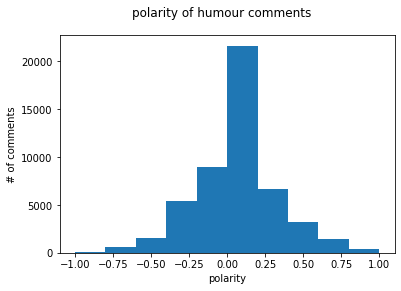

In [9]:
bucketPol=[-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]
bucketSub=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xlabel('polarity')
plt.ylabel('# of comments')
plt.suptitle('polarity of humour comments')
plt.hist(polHum,bins=bucketPol)

(array([  209.,   911.,   878.,  4006.,  9102., 22572.,  7252.,  3139.,
         1383.,   548.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

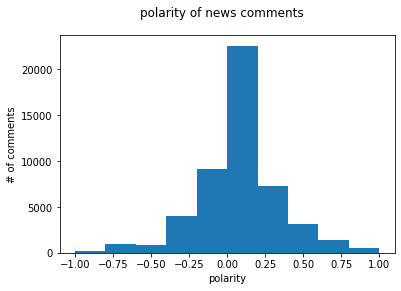

In [10]:
plt.xlabel('polarity')
plt.ylabel('# of comments')
plt.suptitle('polarity of news comments')
plt.hist(polNews,bins=bucketPol)

(array([9732., 2516., 3815., 5636., 6880., 7481., 6728., 3103., 2088.,
        2021.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

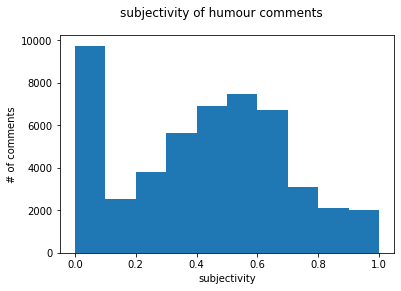

In [11]:
plt.xlabel('subjectivity')
plt.ylabel('# of comments')
plt.suptitle('subjectivity of humour comments')
plt.hist(subHum,bins=bucketSub)

(array([10198.,  2643.,  4579.,  5796.,  6967.,  6941.,  5586.,  3153.,
         2084.,  2053.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

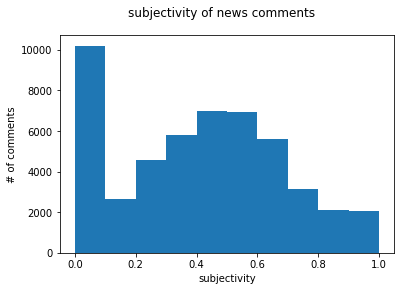

In [12]:
plt.xlabel('subjectivity')
plt.ylabel('# of comments')
plt.suptitle('subjectivity of news comments')
plt.hist(subNews,bins=bucketSub)

In [13]:
import statistics
print('The mean of the polarity of humour comments is '+str(statistics.mean(polHum)))
print('The standard deviation of the polarity of humour comments is '+str(statistics.stdev(polHum)))
print('The mean of the subjectivity of humour comments is '+str(statistics.mean(subHum)))
print('The standard deviation of the subjectivity of humour comments is '+str(statistics.stdev(subHum)))
print('The mean of the polarity of news comments is '+str(statistics.mean(polNews)))
print('The standard deviation of the polarity of news comments is '+str(statistics.stdev(polNews)))
print('The mean of the subjectivity of news comments is '+str(statistics.mean(subNews)))
print('The standard deviation of the subjectivity of news comments is '+str(statistics.stdev(subNews)))

The mean of the polarity of humour comments is 0.03689885524022274
The standard deviation of the polarity of humour comments is 0.27707355891141133
The mean of the subjectivity of humour comments is 0.4097064284222127
The standard deviation of the subjectivity of humour comments is 0.27362188397090936
The mean of the polarity of news comments is 0.050583834095283026
The standard deviation of the polarity of news comments is 0.2733419067626938
The mean of the subjectivity of news comments is 0.39816051842180306
The standard deviation of the subjectivity of news comments is 0.2744939660121272


b.

<function matplotlib.pyplot.show>

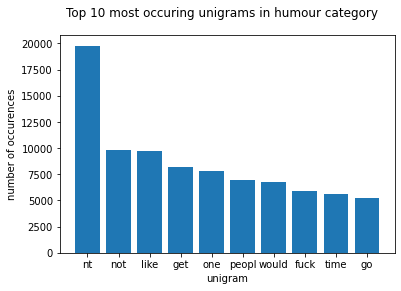

In [14]:
from nltk import ngrams



humUniDict={}
humBiDict={}
newsUniDict={}
newsBiDict={}

for i in reddit_df.index:
  uniBlob=TextBlob(reddit_df.text[i]).ngrams(1)
  lisUni=[' '.join(grams) for grams in uniBlob]
  for j in lisUni:
    if (i<50000):
      insertDict(humUniDict,j)
    else:
      insertDict(newsUniDict,j)
  biBlob=TextBlob(reddit_df.text[i]).ngrams(2)
  lisBi=[' '.join(grams) for grams in biBlob]
  for j in lisBi:
    if (i<50000):
      insertDict(humBiDict,j)
    else:
      insertDict(newsBiDict,j)

tryHashes = sorted(humUniDict.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])

plt.bar(keys,values)
plt.xlabel('unigram')
plt.ylabel('number of occurences')
plt.suptitle('Top 10 most occuring unigrams in humour category')
plt.show


<function matplotlib.pyplot.show>

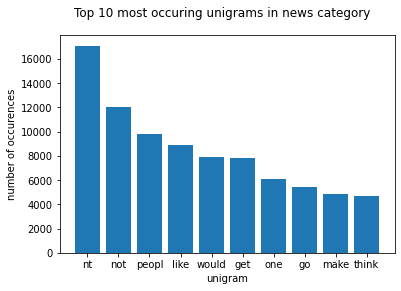

In [15]:
tryHashes = sorted(newsUniDict.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])

plt.bar(keys,values)
plt.xlabel('unigram')
plt.ylabel('number of occurences')
plt.suptitle('Top 10 most occuring unigrams in news category')
plt.show

<function matplotlib.pyplot.show>

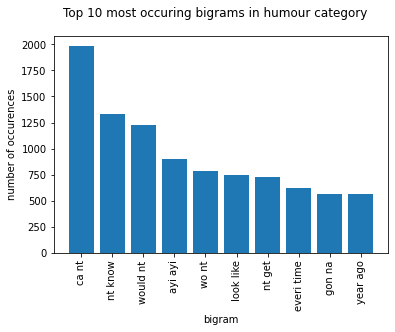

In [18]:
tryHashes = sorted(humBiDict.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])

plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('bigram')
plt.ylabel('number of occurences')
plt.suptitle('Top 10 most occuring bigrams in humour category')
plt.show

<function matplotlib.pyplot.show>

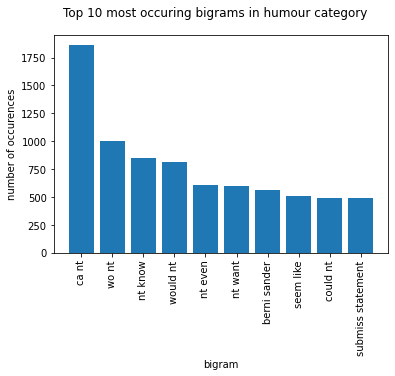

In [19]:
tryHashes = sorted(newsBiDict.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])

plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('bigram')
plt.ylabel('number of occurences')
plt.suptitle('Top 10 most occuring bigrams in humour category')
plt.show

# **Section 2**

**Q1**

a.

In [4]:
check_df=pd.read_csv('/content/drive/MyDrive/midsemDatasets/Brightkite_totalCheckins.txt',delimiter='\t',header=None,names=['user','check-in_time','latitude','longitude','location_id'])
print(check_df)

          user  ...                               location_id
0            0  ...          88c46bf20db295831bd2d1718ad7e6f5
1            0  ...          7a0f88982aa015062b95e3b4843f9ca2
2            0  ...          dd7cd3d264c2d063832db506fba8bf79
3            0  ...  9848afcc62e500a01cf6fbf24b797732f8963683
4            0  ...          2ef143e12038c870038df53e0478cefc
...        ...  ...                                       ...
4747282  58222  ...          9f6b83bca22411dd85460384f67fcdb0
4747283  58224  ...          9f6b83bca22411dd85460384f67fcdb0
4747284  58225  ...          9f6b83bca22411dd85460384f67fcdb0
4747285  58226  ...          9f6b83bca22411dd85460384f67fcdb0
4747286  58227  ...          9f6b83bca22411dd85460384f67fcdb0

[4747287 rows x 5 columns]


In [5]:
timeList=[]
indexDrop=[]
for i in check_df.index:
  punctuations = ''':- TZ'''
  string=str(check_df['check-in_time'][i])
  for x in string:
    if x in punctuations:
      string = string.replace(x, "")
  timeList.append(string)
  if (check_df.location_id[i]=='00000000000000000000000000000000'):
    indexDrop.append(i)
    
check_df.drop(['check-in_time'], axis = 1, inplace = True)
check_df['check-in_time']=timeList
check_df = check_df.drop(indexDrop)
check_df

user  ...   check-in_time
0            0  ...  20101017014853
1            0  ...  20101016060204
2            0  ...  20101016034854
3            0  ...  20101014182551
4            0  ...  20101014002147
...        ...  ...             ...
4747282  58222  ...  20090123023034
4747283  58224  ...  20090103150654
4747284  58225  ...  20090120135814
4747285  58226  ...  20090120133009
4747286  58227  ...  20090121002435

[4492668 rows x 5 columns]

<function matplotlib.pyplot.show>

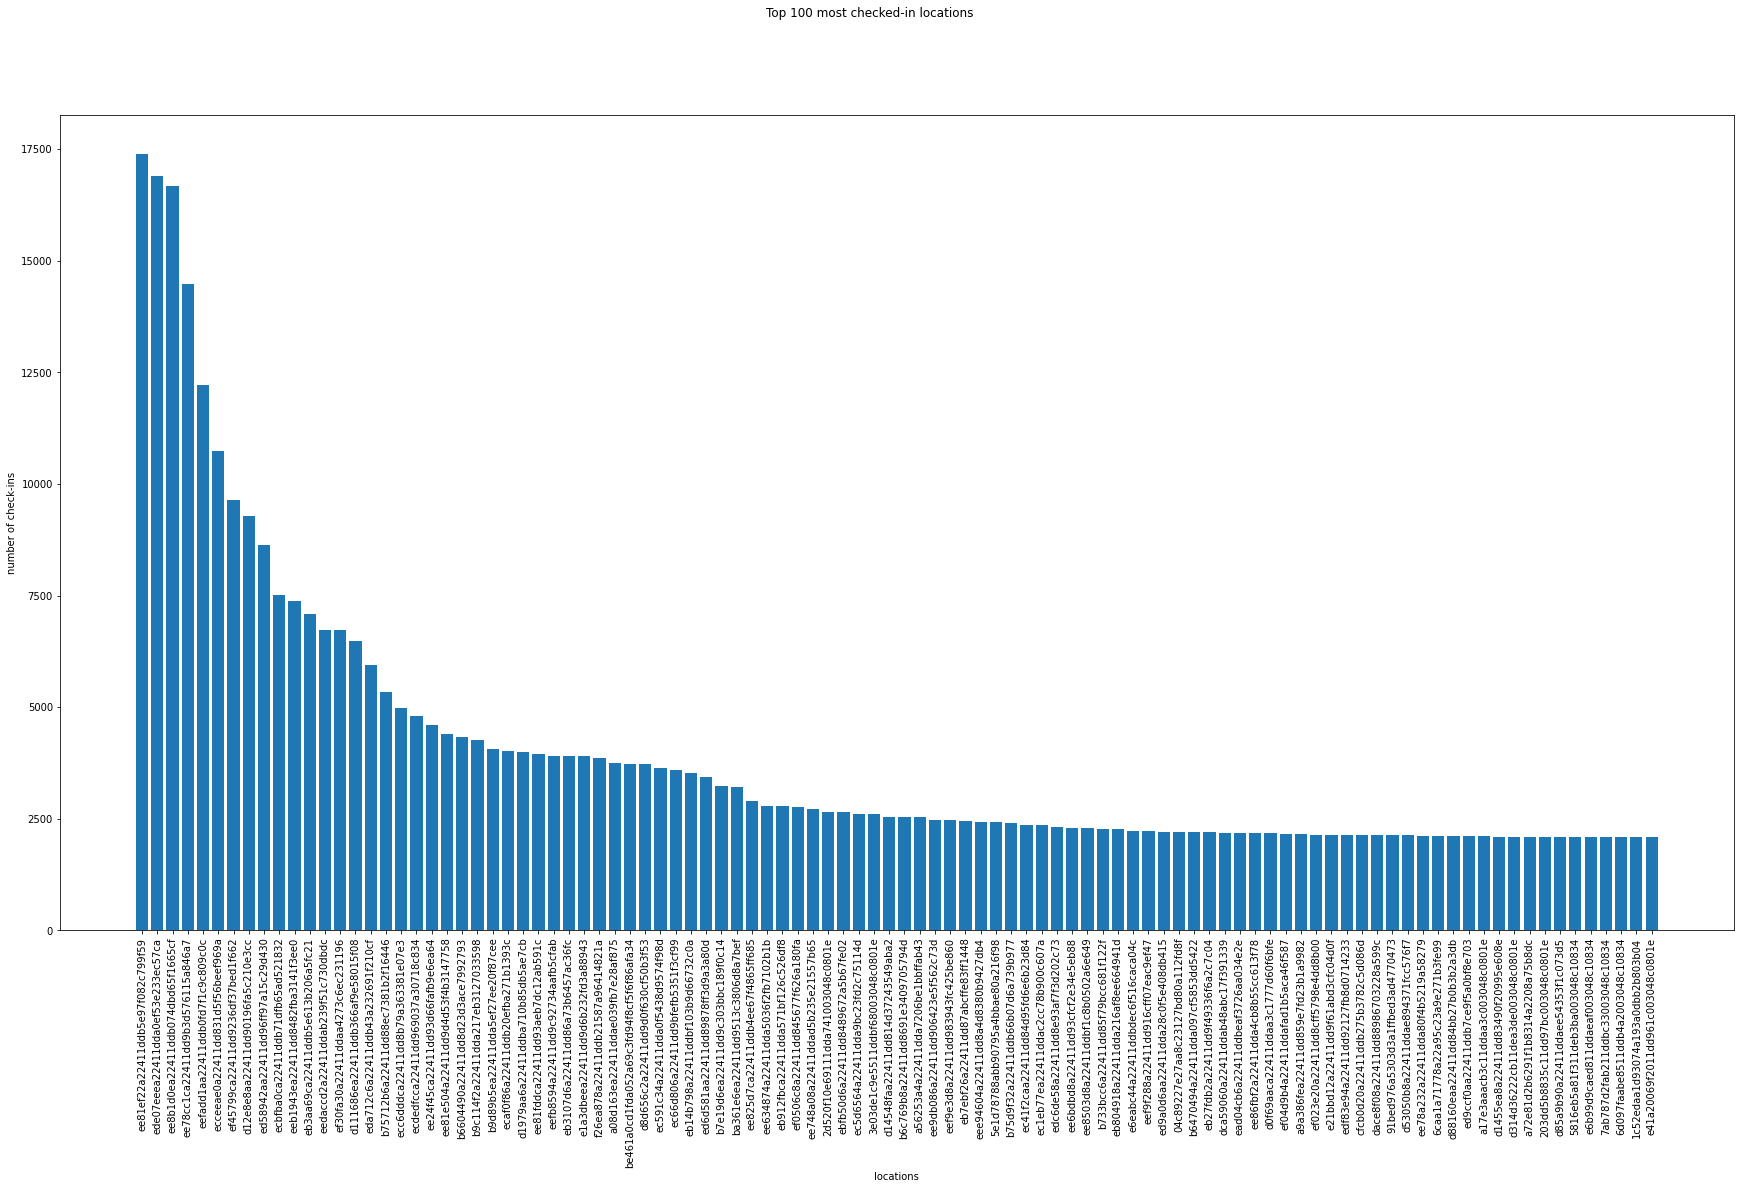

In [7]:
locations={} 
for loc in check_df.location_id:
  insertDict(locations, loc)
tryHashes = sorted(locations.items(), key=lambda item: item[1], reverse=True)[0:100]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])

plt.figure(figsize=(30,15))
plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('locations')
plt.ylabel('number of check-ins')
plt.suptitle('Top 100 most checked-in locations')
plt.show


<function matplotlib.pyplot.show>

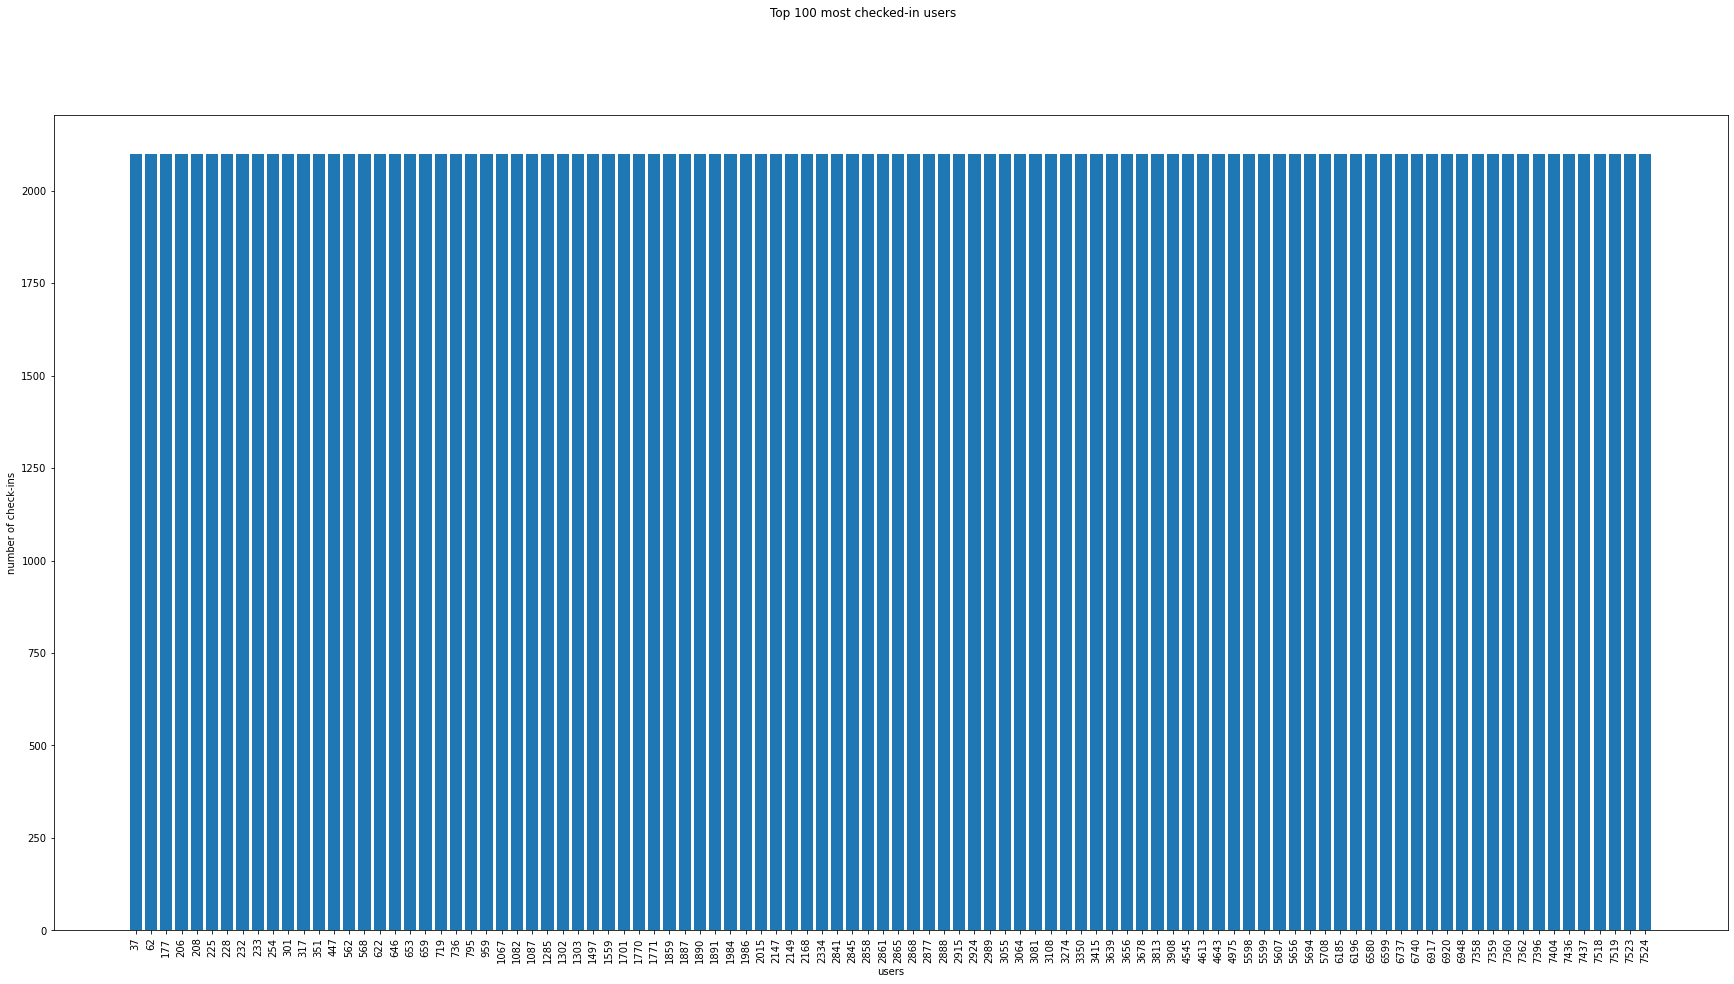

In [8]:
users={}
for use in check_df.user:
  insertDict(users, str(use))
tryHashes = sorted(users.items(), key=lambda item: item[1], reverse=True)[0:100]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])

plt.figure(figsize=(30,15))
plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('users')
plt.ylabel('number of check-ins')
plt.suptitle('Top 100 most checked-in users')
plt.show

b.

In [6]:
!pip install gmaps
import gmaps
import gmaps.datasets

In [7]:
latArr=[]
longArr=[]
for i in tqdm(check_df.index):
  if (check_df.latitude[i]>-90.0 and check_df.latitude[i]<90.0):
    latArr.append(check_df.latitude[i])
    longArr.append(check_df.longitude[i])
map_df=pd.DataFrame(latArr,columns=['latitude'])
map_df['longitude']=longArr

In [8]:
fig=gmaps.figure(map_type='HYBRID')
finMap=gmaps.heatmap_layer(map_df[:50000])
fig.add_layer(finMap)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
from ipywidgets.embed import embed_minimal_html
import IPython
embed_minimal_html('export.html', views=[fig])
IPython.display.HTML(filename='export.html')

c.

In [ ]:
import plotly.graph_objects as gr
import plotly.express as px
check_df['check-in_time']= pd.to_datetime(check_df['check-in_time'], format='%Y%m%d%H%M%S')
# for i in tqdm(check_df.index):
#   check_df.loc[i,'check-in_time']=check_df.loc[i,'check-in_time'].replace(microsecond=0,second=0,minute=0,hour=0)
check_df

user  ...       check-in_time
0            0  ... 2010-10-17 01:48:53
1            0  ... 2010-10-16 06:02:04
2            0  ... 2010-10-16 03:48:54
3            0  ... 2010-10-14 18:25:51
4            0  ... 2010-10-14 00:21:47
...        ...  ...                 ...
4747282  58222  ... 2009-01-23 02:30:34
4747283  58224  ... 2009-01-03 15:06:54
4747284  58225  ... 2009-01-20 13:58:14
4747285  58226  ... 2009-01-20 13:30:09
4747286  58227  ... 2009-01-21 00:24:35

[4492668 rows x 5 columns]

In [ ]:
timeArrLoc=[]
timeArrUse=[]
for i in tqdm(check_df.index):
  if (str(check_df.user[i])=='37'):
    timeArrUse.append(check_df['check-in_time'][i])
  if (str(check_df.location_id[i])=='ee81ef22a22411ddb5e97f082c799f59'):
    timeArrLoc.append(check_df['check-in_time'][i])
timeLoc_df = pd.DataFrame(timeArrLoc,columns =['time']) 
timeUse_df = pd.DataFrame(timeArrUse,columns =['time'])

In [ ]:
timeLoc_df

time
0     2009-05-25 20:56:10
1     2009-09-23 16:37:04
2     2009-09-15 02:50:29
3     2009-09-14 16:12:12
4     2009-09-11 16:04:36
...                   ...
17391 2009-03-31 05:39:02
17392 2009-03-31 05:37:36
17393 2009-03-27 03:14:52
17394 2009-03-26 17:41:56
17395 2009-03-26 04:58:00

[17396 rows x 1 columns]

In [ ]:
for i in tqdm(range(len(timeLoc_df))):
  timeLoc_df.loc[i,'time']=timeLoc_df.loc[i,'time'].replace(microsecond=0,second=0,minute=0,hour=0)

In [ ]:
createdAtDF=timeLoc_df.groupby("time").size().reset_index(name="count")
px.line(createdAtDF,x="time",y="count")

In [ ]:
for i in tqdm(range(len(timeUse_df))):
  timeUse_df.loc[i,'time']=timeUse_df.loc[i,'time'].replace(microsecond=0,second=0,minute=0,hour=0)

In [ ]:
createdAtDF=timeUse_df.groupby("time").size().reset_index(name="count")
px.line(createdAtDF,x="time",y="count")